<a href="https://colab.research.google.com/github/anfalsiddiqui45/mental-health-models/blob/main/svm_tfidf_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

import matplotlib.pyplot as plt


In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/train.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/test.csv")


In [7]:


X_train = train_df["statement"]
y_train = train_df["label"]

X_test = test_df["statement"]
y_test = test_df["label"]


In [8]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=50000,
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


In [9]:
svm_model = LinearSVC(
    class_weight="balanced",
    max_iter=10000
)

svm_model.fit(X_train_tfidf, y_train)


LinearSVC(class_weight='balanced', max_iter=10000)

In [10]:
y_pred = svm_model.predict(X_test_tfidf)


In [11]:
print(classification_report(
    y_test,
    y_pred,
    target_names=["Normal", "Depression", "Anxiety", "Stress"]
))


              precision    recall  f1-score   support

      Normal       0.92      0.94      0.93      3269
  Depression       0.91      0.91      0.91      3081
     Anxiety       0.83      0.82      0.83       768
      Stress       0.72      0.62      0.67       517

    accuracy                           0.90      7635
   macro avg       0.85      0.82      0.83      7635
weighted avg       0.89      0.90      0.90      7635



In [12]:
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "macro_f1": f1_score(y_test, y_pred, average="macro"),
    "weighted_f1": f1_score(y_test, y_pred, average="weighted"),
    "macro_precision": precision_score(y_test, y_pred, average="macro"),
    "macro_recall": recall_score(y_test, y_pred, average="macro")
}

metrics


{'accuracy': 0.8963981663392272,
 'macro_f1': 0.8342629074131894,
 'weighted_f1': 0.8950525991877339,
 'macro_precision': 0.8467041190351966,
 'macro_recall': 0.8239517092165468}

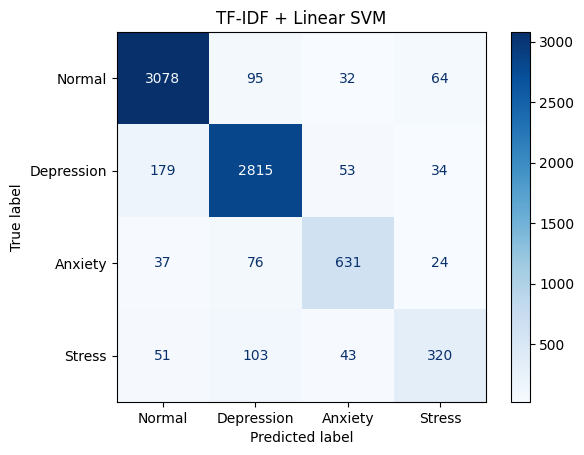

In [13]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Normal", "Depression", "Anxiety", "Stress"]
)

disp.plot(cmap="Blues")
plt.title("TF-IDF + Linear SVM")
plt.show()


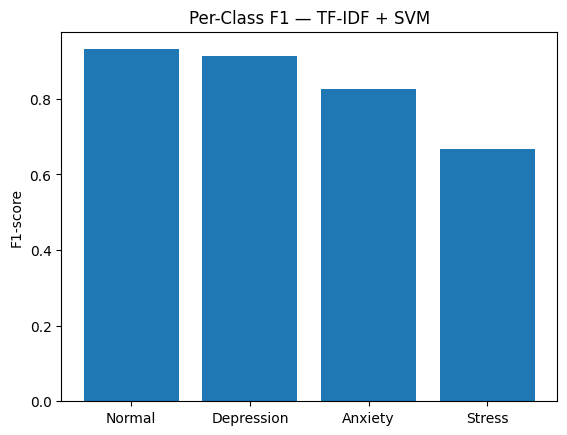

In [14]:
report = classification_report(
    y_test,
    y_pred,
    target_names=["Normal", "Depression", "Anxiety", "Stress"],
    output_dict=True
)

f1_scores = [report[c]["f1-score"] for c in report if c in ["Normal", "Depression", "Anxiety", "Stress"]]

plt.bar(["Normal", "Depression", "Anxiety", "Stress"], f1_scores)
plt.ylabel("F1-score")
plt.title("Per-Class F1 — TF-IDF + SVM")
plt.show()
